## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0811 11:10:05.508241  3012 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 11:10:05.543689  3012 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 11:10:05.552631  3012 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 11:10:05.675903  3012 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 11:10:05.690893  3012 deprecation_wrapper.py:119] From C:\Users\Tr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0811 11:10:10.032948  3012 deprecation.py:323] From C:\Users\Trenton\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0811 11:10:10.087834  3012 deprecation_wrapper.py:119] From C:\Users\Trenton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 318us/step - loss: 1.9395 - acc: 0.2966 - val_loss: 1.7875 - val_acc: 0.3566
Epoch 2/100
50000/50000 [==============================] - 8s 167us/step - loss: 1.7124 - acc: 0.3879 - val_loss: 1.6814 - val_acc: 0.3953
Epoch 3/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6200 - acc: 0.4228 - val_loss: 1.5839 - val_acc: 0.4318
Epoch 4/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.5608 - acc: 0.4451 - val_loss: 1.5929 - val_acc: 0.4323
Epoch 5/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.5141 - acc: 0.4607 - val_loss: 1.4876 - val_acc: 0.4739
Epoch 6/100
50000/50000 [==============================] - 8s 157us/step - loss: 1.4804 - acc: 0.4730 - val_loss: 1.4968 - val_acc: 0.4607
Epoch 7/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.4453 - acc: 0.4851 - val_loss: 1

50000/50000 [==============================] - 8s 156us/step - loss: 0.5529 - acc: 0.8020 - val_loss: 1.9279 - val_acc: 0.5119
Epoch 60/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.5485 - acc: 0.8021 - val_loss: 2.0241 - val_acc: 0.5015
Epoch 61/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.5492 - acc: 0.8035 - val_loss: 1.9535 - val_acc: 0.5123
Epoch 62/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.5390 - acc: 0.8079 - val_loss: 1.9629 - val_acc: 0.5172
Epoch 63/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5192 - acc: 0.8128 - val_loss: 2.0675 - val_acc: 0.5125
Epoch 64/100
50000/50000 [==============================] - 8s 156us/step - loss: 0.5036 - acc: 0.8214 - val_loss: 2.1396 - val_acc: 0.5153
Epoch 65/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.4947 - acc: 0.8238 - val_loss: 2.2069 - val_acc: 0.5045
Epoch 66/100
50000/50000 [=======

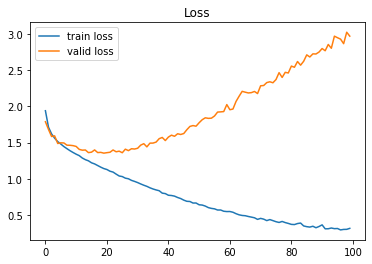

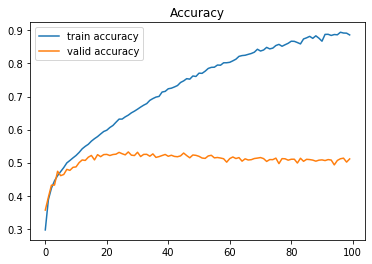

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢